# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [20]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest

### 1. Is the distribution of body temperatures normal?

In [5]:
body_temp = df['temperature']
stats.normaltest(body_temp)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

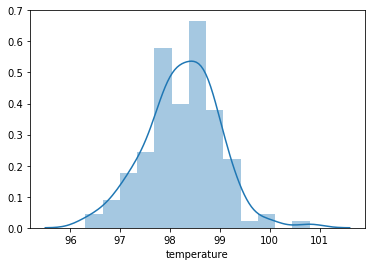

In [6]:
sns.distplot(body_temp)
# visually we can see that the data follows a normal distribution

normaltest returns a tuple, in which the first value is the chi-squared statistic and the second is the p-value. Of interest to us is the p-value. If the p-value is above a certain threshold (usually taken to be 0.05), we can assume that the distribution in hand is a normal distribution.
The p-value obtained is approximately 0.258 which is much greater than 0.05.

**Therefore, the body temperature is a normal distribution.**

### 2. Is the sample size large? Are the observations independent?

In [7]:
len(df)

130

According to the Central Limit theorem the minimum number of samples required is 30.

**Therefore, our sample size of 130 is large enough.**

In [8]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [9]:
df['gender'].value_counts()

F    65
M    65
Name: gender, dtype: int64

It is safe to assume that the temperature and heartbeat measurements of one person is not affected by the measurements of another person, since each person is unique. 
**Therefore, the data rows are  most likely independent.** 

### 3. Is the true population mean really 98.6 degrees F? 

In [10]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


- **Null Hypothesis**: The true population mean is 98.6 degrees F.
- **Alternate Hypothesis**: The true population mean is not equal to 98.6 degrees F.


The sample mean is 98.25. We will use a one-sample test because we are only given one sample dataset. It is more appropriate to use a t-test because the population standard deviation is unkown.

The p-value is chosen to be 0.05. If the test result is below the threshold we reject the null hypothesis(in other words we accept the alternate hypothesis), else we accept the null hypothesis.

In [11]:
t_test = stats.ttest_1samp(df['temperature'], popmean=98.6)
t_test

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The result is < 0.05. Therefore, we reject the null hypothesis for a t-test.

**In other words, the population mean is probably not 98.6 if we use a t-test**

In [14]:
z_test= ztest(df['temperature'],value=98.6)
z_test

(-5.4548232923645195, 4.9021570141012155e-08)

The tuple returns a z-statistic of -5.45 and a p-value of 4.902e-08. p-value < 0.05. Therefore, we reject the null hypothesis for a z-ttest.

**In other words, the population mean is probably not 98.6 if we use a z-test**

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

In [23]:
sample = np.random.choice(df['temperature'], size=10)
sample

array([97.6, 98.2, 97.4, 97. , 98.3, 98.2, 97.5, 98.2, 96.7, 97.8])

In [19]:
sample_t_test = stats.ttest_1samp(sample, popmean=98.6)
sample_t_test

Ttest_1sampResult(statistic=-1.138588649957248, pvalue=0.2842739962366758)

In [22]:
sample_z_test = ztest(sample,value=98.6)
sample_z_test

(-1.138588649957248, 0.25487476462109415)

We should use a t-test for a sample size of 10.
**With a p-value of 0.05 we would accept the null hypothesis for both tests.**

### 5. At what temperature should we consider someone's temperature to be "abnormal"? 

In [26]:
n=len(df['temperature'])

#margin of error
std_error = np.std(df['temperature']) / np.sqrt(n)
std_error
#compute confidence interval at the 95% level
conf_int = stats.t.interval(alpha = .95, df = n-1, loc = np.mean(df['temperature']),
                 scale=stats.sem(df['temperature']))
conf_int

(98.12200290560801, 98.37645863285348)

In [32]:
upper = np.mean(body_temp) + np.std(body_temp)
lower = np.mean(body_temp) - np.std(body_temp)
print('Normal human temperatures are between %f and %f.'%(lower,upper))

Normal human temperatures are between 97.518873 and 98.979589.


**Abnormal human temperature is < 97.518873 or > 98.979589**

### 6. Is there a significant difference between males and females in normal temperature?

- **Null Hypothesis**: The difference between mean female and male temperature is 0.
- **Alternate Hypothesis**: The difference between mean female and male temperature is not 0.


We will use the t-test because we are comparing the means from two samples.

The p-value is chosen to be 0.05. If the test result is below the threshold we reject the null hypothesis(in other words we accept the alternate hypothesis), else we accept the null hypothesis.

In [45]:
np.mean(df.groupby('gender')

In [44]:
t_test_gender,p_value_gender = stats.ttest_ind(a=df[df['gender'] == 'M']['temperature'], b=df[df['gender'] == 'F']['temperature'], equal_var=False)
print('The t-statistic is %f and p-value of %f' %(abs(t_test_gender), p_value_gender))

The t-statistic is 2.285435 and p-value of 0.023938


Since p=0.023938 < 0.05, the null hypothesis is rejected in favour of a difference between mean female and male temperature.
The results of the t-test make sense, because males and females are biologically and physically different. These genetically determined differences probably result in different normal temperatures  